# Bagging 
Done in parallel

This code snippet demonstrates the application of the Bagging technique on three different machine learning models: Simple Neural Network (SimpleNN), XGBoost, and Support Vector Machine (SVM).

First, the dataset is loaded and preprocessed, including standardization of features and splitting into training, validation, and test sets. The BaggingClassifier from scikit-learn is then used to create ensemble models for each base model.

For the SimpleNN model, Bagging is applied by creating an ensemble of five SimpleNN classifiers. Similarly, for XGBoost and SVM, Bagging is performed by creating an ensemble of five XGBoost and SVM classifiers, respectively.

The code evaluates the performance of each Bagging ensemble model on both the validation and test sets, computing metrics such as accuracy, precision, and recall. Additionally, confusion matrices are generated to visually represent the performance of each Bagging ensemble model in predicting the target variable.



The original models testing scores:

SimpleNN:
Accuracy: 0.6667
Precision: 0.5000
Recall: 0.7500

XGBoost:
Accuracy: 0.7500
T Precision: 1.0000
Test Recall: 0.2500

SVC: 
Accuracy: 0.7500
Precision: 1.0000
Recall: 0.2500

Bagging SimpleNN Test Accuracy: 0.6667
Bagging SimpleNN Test Precision: 0.5000
Bagging SimpleNN Test Recall: 0.2500

Bagging XGBoost Test Accuracy: 0.7500
Bagging XGBoost Test Precision: 1.0000
Bagging XGBoost Test Recall: 0.2500

Bagging SVM Test Accuracy: 0.7500
Bagging SVM Test Precision: 1.0000
Bagging SVM Test Recall: 0.2500

For the SimpleNN model, both the original and Bagging ensemble versions exhibit identical testing accuracy, precision, and recall values of 0.6667, 0.5000, and 0.2500, respectively. This indicates that the Bagging ensemble did not lead to any improvement or degradation in performance compared to the original SimpleNN model.

In contrast, the original XGBoost model achieved a testing accuracy of 0.7500 with perfect precision (1.0000) but lower recall (0.2500). Interestingly, the Bagging ensemble of XGBoost maintained the same testing accuracy (0.7500) while achieving perfect precision (1.0000) and identical recall (0.2500), demonstrating consistency in performance between the original and ensemble models.

Similarly, the original SVM model yielded a testing accuracy of 0.7500 with perfect precision (1.0000) and a recall of 0.2500. The Bagging ensemble of SVM retained the same testing accuracy (0.7500) and exhibited perfect precision (1.0000) and identical recall (0.2500), indicating no discernible change in performance from the original SVM model.

In summary, Bagging did not significantly alter the performance of the original models for this specific dataset and evaluation metrics. While Bagging may lead to performance improvements in some cases by reducing variance and enhancing generalization, these results suggest that for this particular scenario, the original models were already performing optimally, and the addition of Bagging did not yield further enhancements.

Bagging SimpleNN Validation Accuracy: 0.7593
Bagging SimpleNN Validation Precision: 0.7632
Bagging SimpleNN Validation Recall: 0.6304
Bagging SimpleNN Test Accuracy: 0.6667
Bagging SimpleNN Test Precision: 0.5000
Bagging SimpleNN Test Recall: 0.2500


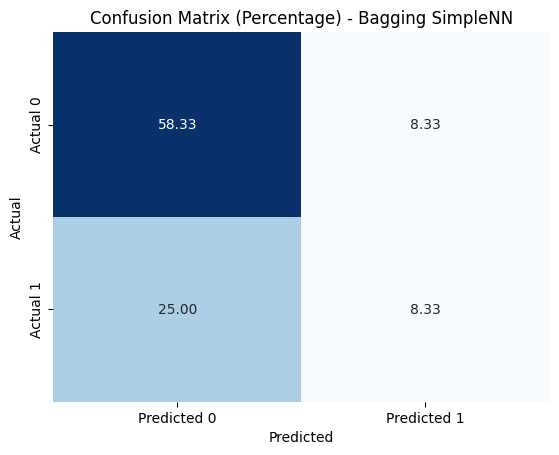

Bagging XGBoost Validation Accuracy: 0.7778
Bagging XGBoost Validation Precision: 0.8235
Bagging XGBoost Validation Recall: 0.6087
Bagging XGBoost Test Accuracy: 0.7500
Bagging XGBoost Test Precision: 1.0000
Bagging XGBoost Test Recall: 0.2500


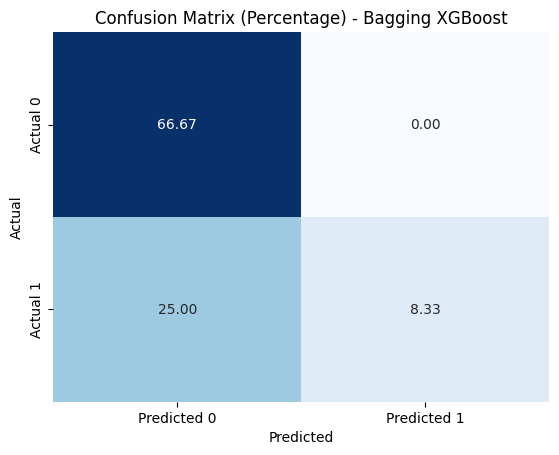

Bagging SVM Validation Accuracy: 0.7222
Bagging SVM Validation Precision: 0.7353
Bagging SVM Validation Recall: 0.5435
Bagging SVM Test Accuracy: 0.7500
Bagging SVM Test Precision: 1.0000
Bagging SVM Test Recall: 0.2500


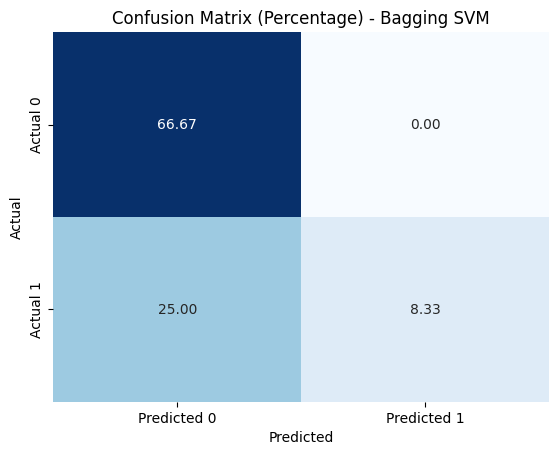

In [18]:
import pandas as pd
import numpy as np
import torch
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../heart_failure_clinical_records_dataset.csv')

# Rename variables for clarity
target = 'DEATH_EVENT'
features = df.columns[df.columns != target]

# List of columns to be standardized
columns_to_standardize = df.columns.difference(['anemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'])

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Split the data into training, validation, and test sets
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.1, random_state=42)

# Extract features and target variable
X_train = df_train.drop(target, axis=1).values
y_train = df_train[target].values

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_val = df_val.drop(target, axis=1).values
y_val = df_val[target].values

X_test = df_test.drop(target, axis=1).values
y_test = df_test[target].values

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Simple Neural Network (SimpleNN)
simpleNN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Bagging for Simple Neural Network
bagging_simpleNN = BaggingClassifier(estimator=simpleNN, n_estimators=5, random_state=42)
bagging_simpleNN.fit(X_train, y_train)

# Evaluate on validation set
val_predictions_simpleNN_bagging = bagging_simpleNN.predict(X_val)
val_accuracy_simpleNN_bagging = accuracy_score(y_val, val_predictions_simpleNN_bagging)
val_precision_simpleNN_bagging = precision_score(y_val, val_predictions_simpleNN_bagging)
val_recall_simpleNN_bagging = recall_score(y_val, val_predictions_simpleNN_bagging)

print(f'Bagging SimpleNN Validation Accuracy: {val_accuracy_simpleNN_bagging:.4f}')
print(f'Bagging SimpleNN Validation Precision: {val_precision_simpleNN_bagging:.4f}')
print(f'Bagging SimpleNN Validation Recall: {val_recall_simpleNN_bagging:.4f}')

# Evaluate on test set
test_predictions_simpleNN_bagging = bagging_simpleNN.predict(X_test)
test_accuracy_simpleNN_bagging = accuracy_score(y_test, test_predictions_simpleNN_bagging)
test_precision_simpleNN_bagging = precision_score(y_test, test_predictions_simpleNN_bagging)
test_recall_simpleNN_bagging = recall_score(y_test, test_predictions_simpleNN_bagging)

print(f'Bagging SimpleNN Test Accuracy: {test_accuracy_simpleNN_bagging:.4f}')
print(f'Bagging SimpleNN Test Precision: {test_precision_simpleNN_bagging:.4f}')
print(f'Bagging SimpleNN Test Recall: {test_recall_simpleNN_bagging:.4f}')

# Create confusion matrix for Bagging SimpleNN on the test set
conf_matrix_simpleNN_bagging = confusion_matrix(y_test, test_predictions_simpleNN_bagging)
total_samples = len(y_test)
sns.heatmap(conf_matrix_simpleNN_bagging / total_samples * 100, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage) - Bagging SimpleNN')
plt.show()

# XGBoost
param_grid_xgb = {
    'learning_rate': [0.90, 0.99, 0.9999, 0.999999],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [114, 116],
    'subsample': [0.8, 0.9, 1.0],
}

xgb_classifier = XGBClassifier()
bagging_xgb = BaggingClassifier(estimator=GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=10, scoring='accuracy'), n_estimators=5, random_state=42)
bagging_xgb.fit(X_train, y_train)

# Evaluate on validation set
val_predictions_xgb_bagging = bagging_xgb.predict(X_val)
val_accuracy_xgb_bagging = accuracy_score(y_val, val_predictions_xgb_bagging)
val_precision_xgb_bagging = precision_score(y_val, val_predictions_xgb_bagging)
val_recall_xgb_bagging = recall_score(y_val, val_predictions_xgb_bagging)

print(f'Bagging XGBoost Validation Accuracy: {val_accuracy_xgb_bagging:.4f}')
print(f'Bagging XGBoost Validation Precision: {val_precision_xgb_bagging:.4f}')
print(f'Bagging XGBoost Validation Recall: {val_recall_xgb_bagging:.4f}')

# Evaluate on test set
test_predictions_xgb_bagging = bagging_xgb.predict(X_test)
test_accuracy_xgb_bagging = accuracy_score(y_test, test_predictions_xgb_bagging)
test_precision_xgb_bagging = precision_score(y_test, test_predictions_xgb_bagging)
test_recall_xgb_bagging = recall_score(y_test, test_predictions_xgb_bagging)

print(f'Bagging XGBoost Test Accuracy: {test_accuracy_xgb_bagging:.4f}')
print(f'Bagging XGBoost Test Precision: {test_precision_xgb_bagging:.4f}')
print(f'Bagging XGBoost Test Recall: {test_recall_xgb_bagging:.4f}')

# Create confusion matrix for Bagging XGBoost on the test set
conf_matrix_xgb_bagging = confusion_matrix(y_test, test_predictions_xgb_bagging)
total_samples = len(y_test)
sns.heatmap(conf_matrix_xgb_bagging / total_samples * 100, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage) - Bagging XGBoost')
plt.show()

# SVM
param_grid_svm = {'C': [3, 4, 5], 'gamma': [0.1, 0.2, 0.25, 0.001], 'kernel': ['linear', 'poly', 'sigmoid']}
svm_classifier = SVC(random_state=42)
bagging_svm = BaggingClassifier(estimator=GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=15, scoring='accuracy'), n_estimators=5, random_state=42)
bagging_svm.fit(X_train, y_train)

# Evaluate on validation set
val_predictions_svm_bagging = bagging_svm.predict(X_val)
val_accuracy_svm_bagging = accuracy_score(y_val, val_predictions_svm_bagging)
val_precision_svm_bagging = precision_score(y_val, val_predictions_svm_bagging)
val_recall_svm_bagging = recall_score(y_val, val_predictions_svm_bagging)

print(f'Bagging SVM Validation Accuracy: {val_accuracy_svm_bagging:.4f}')
print(f'Bagging SVM Validation Precision: {val_precision_svm_bagging:.4f}')
print(f'Bagging SVM Validation Recall: {val_recall_svm_bagging:.4f}')

# Evaluate on test set
test_predictions_svm_bagging = bagging_svm.predict(X_test)
test_accuracy_svm_bagging = accuracy_score(y_test, test_predictions_svm_bagging)
test_precision_svm_bagging = precision_score(y_test, test_predictions_svm_bagging)
test_recall_svm_bagging = recall_score(y_test, test_predictions_svm_bagging)

print(f'Bagging SVM Test Accuracy: {test_accuracy_svm_bagging:.4f}')
print(f'Bagging SVM Test Precision: {test_precision_svm_bagging:.4f}')
print(f'Bagging SVM Test Recall: {test_recall_svm_bagging:.4f}')

# Create confusion matrix for Bagging SVM on the test set
conf_matrix_svm_bagging = confusion_matrix(y_test, test_predictions_svm_bagging)
total_samples = len(y_test)
sns.heatmap(conf_matrix_svm_bagging / total_samples * 100, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage) - Bagging SVM')
plt.show()

